## Random Forest

In [57]:
import pandas as pd 

input2 = 'data/fingerprint.csv'
input1 = 'data/ReactionSmiles.csv'
output= 'data/output_file.csv'

df2 = pd.read_csv(input2, sep=',')
df1 = pd.read_csv(input1, sep=',')
print(df1.columns)
print(df2.columns)

#generem un diccionari que assigni les cadenes SMILES als valors dels descriptors
molecule_descriptors = df2.set_index('Smiles').to_dict('index')
print(molecule_descriptors)
# Funció per afegir descriptors a les reaccions.
def add_descriptors(row):
    reaction_smiles = row['Reaction']
    reactants, products = reaction_smiles.split('>>')
    reactant_smiles = reactants.split('.')
    product_smiles = products.split('.')
    llistadescriptors=['MW','logP',"TPSA", "Rings Count", "Aromatic Rings", "Heavy atoms cout", "Alifatic Rings", "CSP3", "BalabanJ", "RotatableBonds", "H-bond donor", "H-bond acceptor"]
       
    reactrow=pd.Series([0]*12,index=llistadescriptors)
    
    
    
    # Recorre cada reactiu i producte i s'afegeixen els descriptors si aquests es troben al diccionari de descriptors de molècules
    for reactant in reactant_smiles:
        try:
            print("reactant:,",reactant)
            print(molecule_descriptors[reactant])
            ser2=pd.Series(molecule_descriptors[reactant]) #eliminem la columna Unnamed i fem la sumna  dels valors de cada variable dels reactius.
            reactrow=reactrow.add(ser2)
        except KeyError:
            print(f"No descriptors found for reactant: {reactant}")

  
    
    row = pd.concat([row, reactrow], ignore_index=True)
    return row


# Apliquem la funció add_descriptors a cada fila del dataframe de reaccions.
reactions_df = df1.apply(add_descriptors, axis=1)


# escrivim el dataframe en un csv
reactions_df.to_csv('data/XX.csv', index=False)

Index(['Unnamed: 0', 'SabioReactionID', 'Reaction'], dtype='object')
Index(['Unnamed: 0', 'MW', 'logP', 'TPSA', 'Rings Count', 'Aromatic Rings',
       'Heavy atoms count', 'Aliphatic Rings', 'CSP3', 'BalabanJ',
       'Rotatable Bonds', 'H-bond donor', 'H-bond acceptor', 'Smiles'],
      dtype='object')
{'C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)OP(=O)(O)O': {'Unnamed: 0': 0, 'MW': 260.02971862600003, 'logP': -3.104399999999999, 'TPSA': 156.91, 'Rings Count': 1, 'Aromatic Rings': 1, 'Heavy atoms count': 16, 'Aliphatic Rings': 1, 'CSP3': 1.0, 'BalabanJ': 2.572326379287313, 'Rotatable Bonds': 3, 'H-bond donor': 6, 'H-bond acceptor': 7}, 'C([C@@H]1[C@H]([C@@H]([C@](O1)(CO)O)O)O)OP(=O)(O)O': {'Unnamed: 0': 1, 'MW': 260.02971862600003, 'logP': -3.1028, 'TPSA': 156.91, 'Rings Count': 1, 'Aromatic Rings': 1, 'Heavy atoms count': 16, 'Aliphatic Rings': 1, 'CSP3': 1.0, 'BalabanJ': 2.613201181998435, 'Rotatable Bonds': 4, 'H-bond donor': 6, 'H-bond acceptor': 7}, 'Nc3ncnc1c3(ncn1C2OC(COP(O)

In [31]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos

import matplotlib.pyplot as plt

# Preprocesado y modelado

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing



#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [45]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [63]:
#Importem el dataset i el preparem per generar el model Random Forest

input="data/R_w_D_T.csv"

df = pd.read_csv(input, sep=",")
eliminar=["SabioReactionID","1","2","3","4","10","11","25","18","19","26","14","15","29","30", "23", "24", "27", "28", "31", "32", "5","7", "13", "14", "20", "22", "28", "21" ]
df = df.drop(eliminar, axis=1)
df = df.dropna()

def modificar_valor(valor):
    if pd.isna(valor):  # Verificar si el valor es NaN
        return valor  # Devolver NaN sin modificar
    numeros = valor.split('.')  # Separar los números por el punto
    primer_numero = int(numeros[0])  # Obtener el primer número
    return str(primer_numero)  # Devolver el primer número como string


# Aplicar la función a la columna 'ECNumber' utilizando el método 'apply'
df['ECNumber'] = df['ECNumber'].apply(modificar_valor)
new_columns = [ "Balaband J", "H bond acceptor", "H bond donor", 'MW', 'TPSA','logP',"ECNumber"]
df.columns = new_columns

df.to_csv("data/RF.csv", index=False)

## Anàlisis exploratori

In [71]:
input="data/RF.csv"
df = pd.read_csv(input, sep=",")
df.head(4)

Balaband J  H bond acceptor  H bond donor          MW    TPSA     logP  \
0    2.572326              7.0           6.0  260.029719  156.91 -3.10440   
1    4.302611             21.0          13.0  767.025464  436.04 -5.54083   
2    2.674029              8.0           7.0  339.996049  203.44 -2.98580   
3    3.550749              4.0           3.0  169.998025  104.06 -1.34450   

   ECNumber  
0         5  
1         2  
2         4  
3         5

# Tipo de cada columna

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Balaband J       5220 non-null   float64
 1   H bond acceptor  5220 non-null   float64
 2   H bond donor     5220 non-null   float64
 3   MW               5220 non-null   float64
 4   TPSA             5220 non-null   float64
 5   logP             5220 non-null   float64
 6   ECNumber         5220 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 285.6 KB


Totes les columnes són del tipus adequat.

# Nombre d'observacions i valos NaN

In [73]:
df.shape
df.isna().sum().sort_values()

Balaband J         0
H bond acceptor    0
H bond donor       0
MW                 0
TPSA               0
logP               0
ECNumber           0
dtype: int64

Cap variable conté valors nuls. 

# Variable Resposta

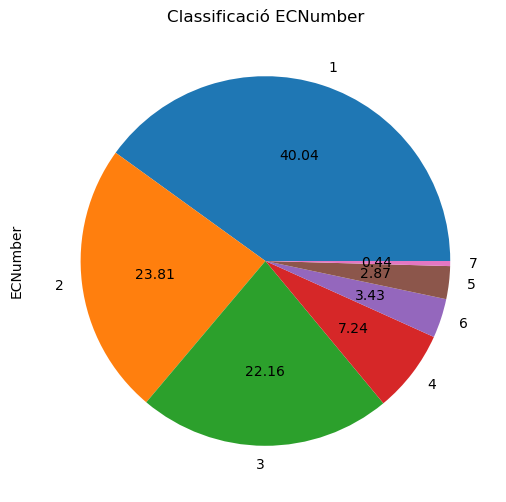

In [77]:
plot = df['ECNumber'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Classificació ECNumber')


## Variable numèriques

In [79]:
# Variables numéricas
df.select_dtypes(include=['float64']).describe()

Balaband J  H bond acceptor  H bond donor           MW         TPSA  \
count  5220.000000      5220.000000   5220.000000  5220.000000  5220.000000   
mean      4.226237        13.716667      7.807854   596.681729   285.051743   
std       1.759312         9.172152      4.839447   360.734227   168.087154   
min       0.000000         0.000000      0.000000    18.010565     0.000000   
25%       2.850332         6.000000      4.000000   303.140770   144.520000   
50%       4.149354        13.000000      8.000000   544.412775   264.130000   
75%       5.434615        20.000000     11.000000   835.171447   397.405000   
max      11.196671        53.000000     32.000000  2691.254031  1042.880000   

              logP  
count  5220.000000  
mean     -2.345059  
std       3.423400  
min     -17.258300  
25%      -4.446570  
50%      -2.622295  
75%      -0.592857  
max      16.317200

Text(0.5, 0.98, 'Distribución variables numéricas')

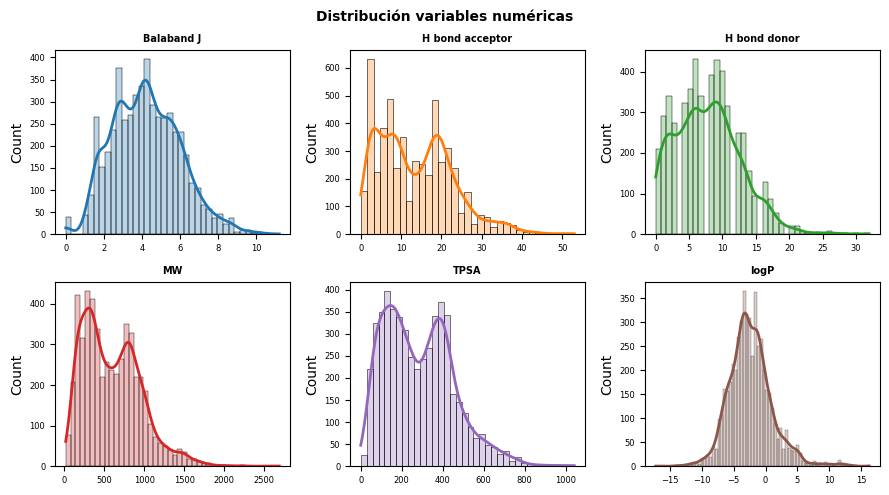

In [84]:
# Grafic de distribució per cada variable numèrica.
import seaborn as sns

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

In [92]:
input="data/RF.csv"
df = pd.read_csv(input, sep=",")

# Reparto de datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('ECNumber', axis = 'columns'),
                                        df['ECNumber'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



y_train_counts = y_train.value_counts()
y_train_proportions = y_train.value_counts(normalize=True)

print(y_train_counts)
print(y_train_proportions)

1    1682
2    1014
3     909
4     297
6     138
5     118
7      18
Name: ECNumber, dtype: int64
1    0.402778
2    0.242816
3    0.217672
4    0.071121
6    0.033046
5    0.028257
7    0.004310
Name: ECNumber, dtype: float64


In [93]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# Fitting Random Forest Classification to the Training set
rf=classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 100)
rf.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=100)

In [117]:
y_pred = rf.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8237547892720306


# Error del test

In [133]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = y_pred,
        squared = False
       )
rmse

0.9529144646879353

In [129]:
from sklearn.metrics import classification_report

# Supongamos que tienes el modelo entrenado y los datos de prueba
y_pred = rf.predict(X_test)

# Calcular el reporte de clasificación
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.86      0.93      0.89       408
           2       0.78      0.75      0.76       229
           3       0.85      0.95      0.90       248
           4       0.67      0.43      0.53        81
           5       0.62      0.50      0.55        32
           6       0.88      0.56      0.69        41
           7       0.00      0.00      0.00         5

    accuracy                           0.82      1044
   macro avg       0.67      0.59      0.62      1044
weighted avg       0.81      0.82      0.81      1044



## Visualització dels resultats

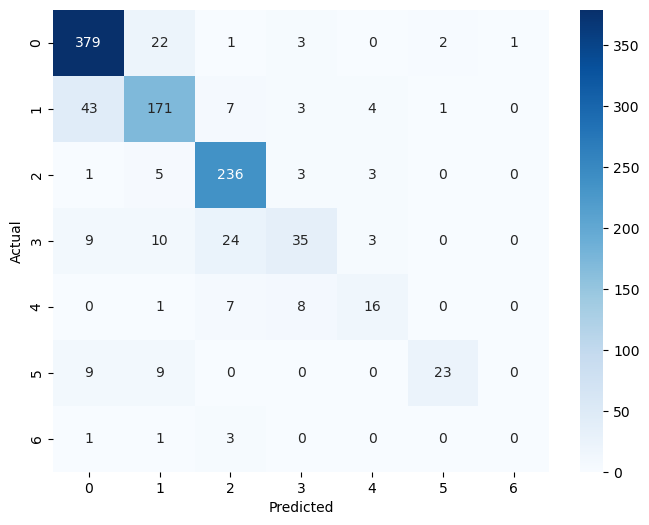

In [119]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [130]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print(report)

              precision    recall  f1-score   support

           1       0.86      0.93      0.89       408
           2       0.78      0.75      0.76       229
           3       0.85      0.95      0.90       248
           4       0.67      0.43      0.53        81
           5       0.62      0.50      0.55        32
           6       0.88      0.56      0.69        41
           7       0.00      0.00      0.00         5

    accuracy                           0.82      1044
   macro avg       0.67      0.59      0.62      1044
weighted avg       0.81      0.82      0.81      1044



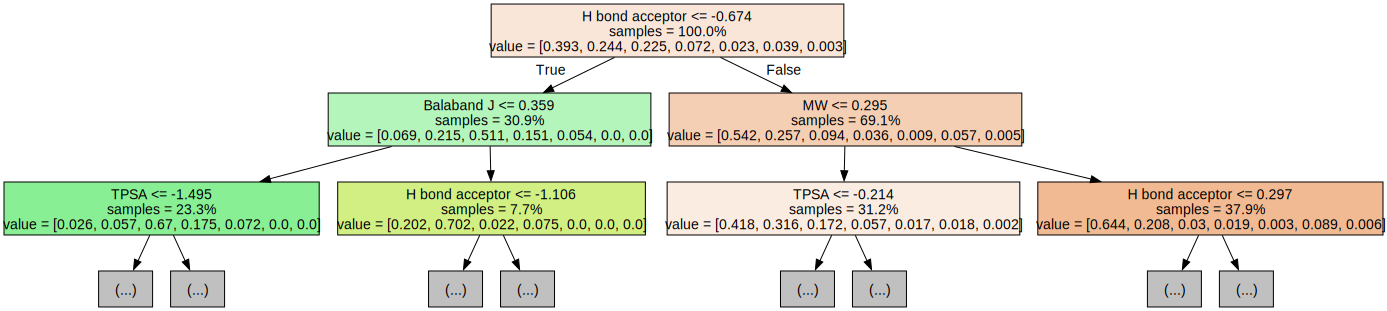

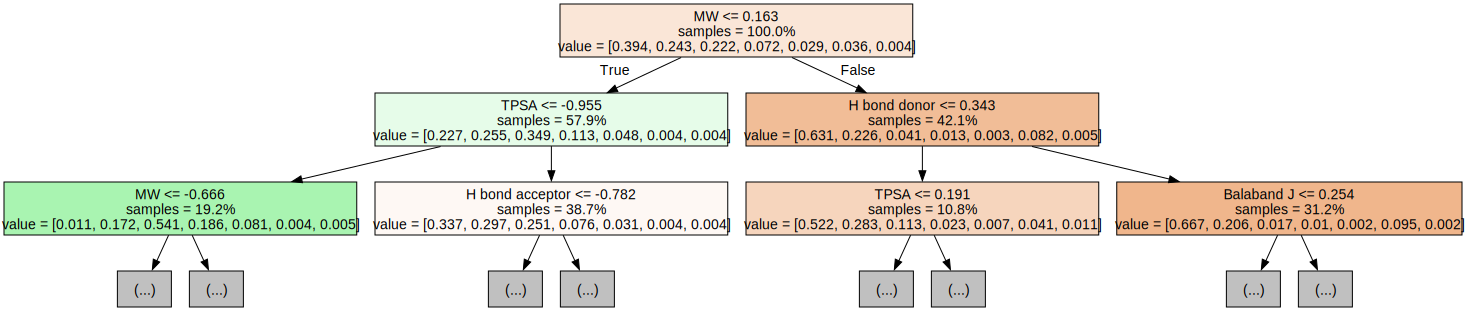

In [70]:
# Export the first three decision trees from the forest
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=["Balaband J", "H bond acceptor", "H bond donor", 'MW', 'TPSA','logP',])

# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_df.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


# K-NN 

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [136]:


X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('ECNumber', axis = 'columns'),
                                        df['ECNumber'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



NameError: name 'head' is not defined

In [153]:
k = 3  # Número de vecinos a considerar
classifier = KNeighborsClassifier(n_neighbors=k)

In [154]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.6580459770114943


# Gradient Boosting Trees

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar las características (X) y las etiquetas (y)
X = df.drop('ECNumber', axis=1)
y = df['ECNumber']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Gradient Boosting Trees
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.7854406130268199
